# 【ライブラリ】

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

# 【EDA】

# ▼購買データ

In [3]:
# 購買データ読み込み
df = pd.read_csv("/Users/yutennnnn/★コンペ/kaggleコンペ(H&M)/transactions_rakus_train.csv", dtype={"article_id": str})
print(df.shape)
df.head()

(31218444, 5)


,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2


----------------------------  
t_dat：購入日付  
customer_id：顧客の一意なid  
article_id：各商品の一意なid  
price：価格  
sales_cannel_id：販売チャネル　1(店舗) or 2(オンライン) 
----------------------------

In [4]:
# 購入日付の期間
print(min(df['t_dat']))
print(max(df['t_dat']))

2018-09-20
2020-09-06


In [5]:
# 価格の統計量
pd.set_option('display.float_format', '{:.4f}'.format)
df.describe()['price']

count   31218444.0000
mean           0.0277
std            0.0191
min            0.0000
25%            0.0155
50%            0.0254
75%            0.0339
max            0.5915
Name: price, dtype: float64

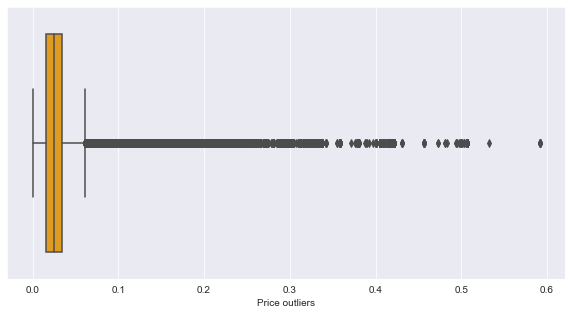

In [6]:
# 価格の可視化
sns.set_style("darkgrid")
f, ax = plt.subplots(figsize=(10,5))
ax = sns.boxplot(data=df, x='price', color='orange')
ax.set_xlabel('Price outliers')
plt.show()

2    21981207
1     9237237
Name: sales_channel_id, dtype: int64

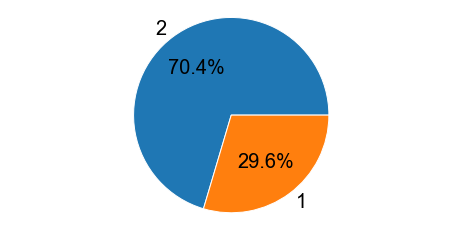

In [7]:
# sales_channel_id（販売チャネル：店舗orオンライン）
sales_ch = df['sales_channel_id'].value_counts()
sales_ch

display(sales_ch)

sales_ch = pd.DataFrame(sales_ch)

# 円グラフ
sizes = sales_ch['sales_channel_id']
labels = sales_ch.index.tolist()
fig1, ax1 = plt.subplots(figsize = (8,4))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=0, textprops = {"fontsize":20, "color": "black"})
ax1.axis('equal')
plt.show()

↑オンライン約70％、店舗約30％

In [8]:
# 購入数トップ10
transaction_by_id = df.groupby('customer_id').count()
transaction_by_id.sort_values(by='price', ascending=False)['price'][:10]

customer_id
be1981ab818cf4ef6765b2ecaea7a2cbf14ccd6e8a7ee985513d9e8e53c6d91b    1876
b4db5e5259234574edfff958e170fe3a5e13b6f146752ca066abca3c156acc71    1404
49beaacac0c7801c2ce2d189efe525fe80b5d37e46ed05b50a4cd88e34d0748f    1330
a65f77281a528bf5c1e9f270141d601d116e1df33bf9df512f495ee06647a9cc    1315
cd04ec2726dd58a8c753e0d6423e57716fd9ebcf2f14ed6012e7e5bea016b4d6    1208
55d15396193dfd45836af3a6269a079efea339e875eff42cc0c228b002548a9d    1196
c140410d72a41ee5e2e3ba3d7f5a860f337f1b5e41c27cf9bda5517c8774f8fa    1165
8df45859ccd71ef1e48e2ee9d1c65d5728c31c46ae957d659fa4e5c3af6cc076    1155
03d0011487606c37c1b1ed147fc72f285a50c05f00b9712e0fc3da400c864296    1138
6cc121e5cc202d2bf344ffe795002bdbf87178054bcda2e57161f0ef810a4b55    1124
Name: price, dtype: int64

↑個人客でなく業者かも？

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


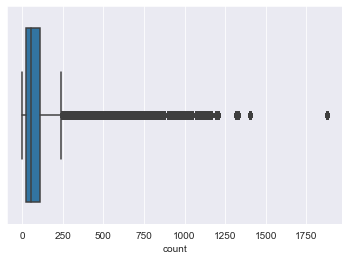

In [9]:
# 顧客ごとの購入回数をみる

# 新たにデータフレーム作成
df_customers = df['customer_id'].value_counts()
df_customers = df_customers.reset_index()
df_customers.columns = ['customer_id', 'count']

# 元の購買データへマージ
df_customers_merge = pd.merge(df, df_customers, on='customer_id')

# 箱ひげ図
sns.boxplot(df_customers_merge['count'])
plt.show()

In [10]:
# 売れ行きの少ない商品（1個しか売れていない）
df_article_value_counts = df['article_id'].value_counts()
df_article_value_counts = pd.DataFrame(df_article_value_counts)
df_article_value_counts.query('article_id < 2')

,article_id
568595001,1
777443001,1
609138002,1
555470004,1
829600001,1
...,...
584584003,1
618256003,1
913099001,1
553873031,1


↑全アイテム約105000個のうち、約4％が1個しか売れていない。

In [11]:
# 売れ行きの少ないアイテム（10個未満）
df_article_value_counts.query('article_id < 10')

,article_id
592743054,9
695051004,9
662371004,9
768300001,9
874113026,9
...,...
584584003,1
618256003,1
913099001,1
553873031,1


↑全アイテム約105,000個のうち、約20％が販売数10個未満。

In [12]:
# 販売数の平均値
df_article_value_counts['article_id'].mean()

304.39794067747033

In [13]:
# 販売数の中央値
df_article_value_counts['article_id'].median()

65.0

In [14]:
# 同じ商品を複数回買ってる人数を調査

# エンコーディング用のデータフレームを作っておく
df_encoding = df

# カスタマーIDをラベルエンコーディング
le = LabelEncoder()
df_encoding['customer_id'] = le.fit_transform(df_encoding['customer_id'])

# エンコーディング結果の確認
df_encoding['customer_id'].unique()

# 重複行の抽出
df_duplicate = df_encoding.duplicated(subset=['customer_id', 'article_id'])

# データフレーム型へ変更
df_duplicate = pd.DataFrame(df_duplicate)
df_duplicate

# 重複行を確認（Trueが重複）
df_duplicate.value_counts()

# 元データに重複行をマージ
df_merge = pd.merge(df, df_duplicate, left_index=True, right_index=True)
df_merge.head()

# マージデータのカラム名を変更
df_merge = df_merge.rename(columns={0 : 'duplicate'})
df_merge.head()

# 重複行のみ抽出
df_duplicated = df_merge.query('duplicate == True')
duplicated_customer_id = df_duplicated['customer_id'].unique()
len(duplicated_customer_id)

663565

↑同じアイテムを複数回買っている人数は約66万人  

# ▼商品データ

In [15]:
# 商品データ読み込み
article = pd.read_csv("/Users/yutennnnn/★コンペ/kaggleコンペ(H&M)/articles.csv")
print(article.shape)
article.head()

(105542, 25)


,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


------------------------------------------  
article_id： 一意のid  
product_code, prod_name： 各商品の一意なidと名称  
product_type, product_type_name： 商品をグループ化したものとその名称  
graphical_appearance_no, graphical_appearance_name： 画像のグループとその名前  
color_group_code, color_group_name： 色のグループとその名前  
------------------------------------------

In [16]:
# アイテム数
print(f'len(article)：{len(article)}')
articole_cnt = article['article_id'].nunique()
print(f' アイテム数 {articole_cnt}')

len(article)：105542
 アイテム数 105542


In [17]:
# 商品データの特性
# article.info()

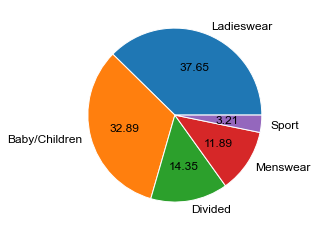

In [20]:
# 商品カテゴリ（大項目）
index_name_cnts = article['index_group_name'].value_counts().sort_values(ascending=False)
index_name_item = pd.DataFrame(index_name_cnts)
index_name_item = index_name_item[:20]

# インデックスを列に変換
index_name_item.reset_index(inplace=True)
# 列名変更
index_name_item = index_name_item.rename(columns={'index_group_name':'index_type_name'})
index_name_item = index_name_item.rename(columns={'index':'index_group_name'})

# 円グラフ
figure, ax = plt.subplots(1,1, figsize = (8,4))
plt.pie(index_name_item['index_type_name'], 
        labels=index_name_item['index_group_name'].values,
        autopct="%.2f",
        textprops = {"fontsize":12, "color": "black"})
plt.show()

↑レディスウェアの占める割合が最多。スポーツウェア最小。

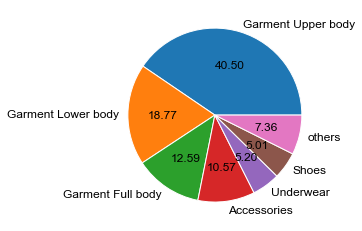

In [21]:
# 商品カテゴリ（中項目）

product_group_name_cnts = article['product_group_name'].value_counts()
product_group_name_item = pd.DataFrame(product_group_name_cnts)

# インデックスを列に変換
product_group_name_item.reset_index(inplace=True)

# 列名変更
product_group_name_item = product_group_name_item.rename(columns={'product_group_name':'cnt'})
product_group_name_item = product_group_name_item.rename(columns={'index':'product_group_name'})

# Swimwear以降がothersとして集約
others = product_group_name_item.loc[6:18,'cnt'].sum()

# othersに集約した商品をデータフレームから削除
product_group_name_item = product_group_name_item.drop(index=[6,7,8,9,10,11,12,13,14,15,16,17,18], axis=0)

# もとのデータフレームにothers行を追加
product_group_name_item.loc[6] = ['others', others]

# 円グラフ
figure, ax = plt.subplots(1,1, figsize = (8,4))
plt.pie(product_group_name_item['cnt'], 
        labels=product_group_name_item['product_group_name'].values,
        autopct="%.2f",
        textprops = {"fontsize":12, "color": "black"})
plt.show()

↑トップスが最多で約40％、次いでボトムスやアクセサリーが多い。

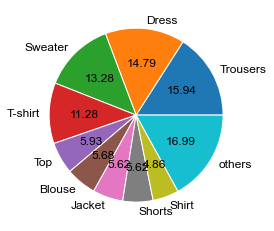

In [22]:
# 商品カテゴリ（小項目）
product_type_name_cnt = article['product_type_name'].value_counts()
product_type_name_item = pd.DataFrame(product_type_name_cnt)
product_type_name_item = product_type_name_item[:15]

# インデックスを列に変換
product_type_name_item.reset_index(inplace=True)

# 列名変更
product_type_name_item = product_type_name_item.rename(columns={'product_type_name':'cnt'})
product_type_name_item = product_type_name_item.rename(columns={'index':'product_type_name'})

# Swimwear以降がothersとして集約
others = product_type_name_item.loc[10:15,'cnt'].sum()

# othersに集約した商品をデータフレームから削除
product_type_name_item = product_type_name_item.drop(index=[9,10,11,12,13,14], axis=0)

# もとのデータフレームにothers行を追加
product_type_name_item.loc[9] = ['others', others]

# 円グラフ
figure, ax = plt.subplots(1,1, figsize = (8,4))
plt.pie(product_type_name_item['cnt'], 
        labels=product_type_name_item['product_type_name'].values,
        autopct="%.2f",
        textprops = {"fontsize":12, "color": "black"})
plt.show()

↑中項目で最も多かったトップスは、Tシャツやセーター、ドレスなどが特に多いのが確認できる。

<AxesSubplot:>

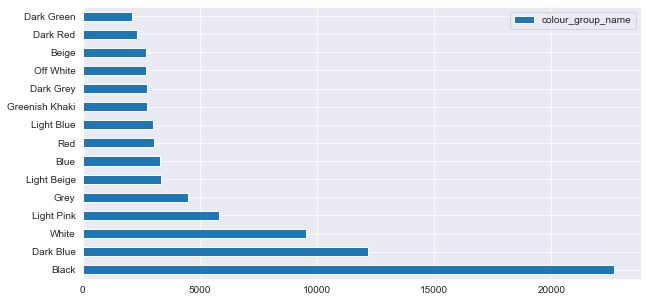

In [23]:
# 商品カラー
colour_group_name_cnts = article['colour_group_name'].value_counts()
colour_group_name_item = pd.DataFrame(colour_group_name_cnts)
colour_group_name_item = colour_group_name_item[:15]

figure, ax = plt.subplots(1,1, figsize = (10,5))
colour_group_name_item.plot.barh(ax = ax) # 棒グラフ

↑ブラックが圧倒的に多く、次いでダークブルー、ホワイト。

# ▼顧客データ

In [21]:
# 顧客データ読み込み
customers = pd.read_csv("/Users/yutennnnn/★コンペ/kaggleコンペ(H&M)/customers_rakus.csv")
print(customers.shape)
customers.head()

(1362281, 7)


,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0000,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0000,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0000,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0000,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0000,1.0000,ACTIVE,Regularly,52.0000,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


--------------------------------------  
customer_id：各顧客の一意なid  
FN：0 or 1  
Active：0 or 1 
club_member_status：会員情報  
fashion_news_frequency：ニュースを送る頻度  
age：現在の年齢  
postal_code：郵便番号  
--------------------------------------

            age
20 – 25  283359
25 – 30  225704
30 – 35  130379
35 – 40   79344
40 – 45   88402
45 – 50  127083
50 – 55  127915
55 – 60   80629
60 – 65   41316
65 – 70   21547


<AxesSubplot:>

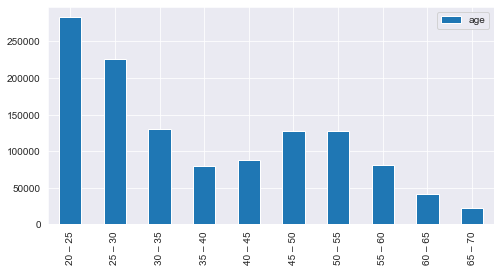

In [22]:
# 年齢の分布
ages=pd.DataFrame(customers['age'].value_counts().sort_index())
labels = [ '{0} – {1}'.format(i, i + 5) for i in range(20, 70, 5) ]
c=pd.cut(ages.index,bins=np.arange(20, 75, 5),labels=labels)
h_ages=ages.groupby(c).sum()
print(h_ages)

figure, ax = plt.subplots(1,1, figsize = (8,4))
h_ages.plot.bar(ax = ax) # 棒グラフ

↑二峰性あり  
20〜30歳あたりがメインカスタマー  
45〜55歳あたりは親御世代が子供服を買っている？

In [23]:
# 会員情報詳細
customers['club_member_status'].value_counts()

ACTIVE        1263183
PRE-CREATE      92578
LEFT CLUB         466
Name: club_member_status, dtype: int64

<AxesSubplot:>

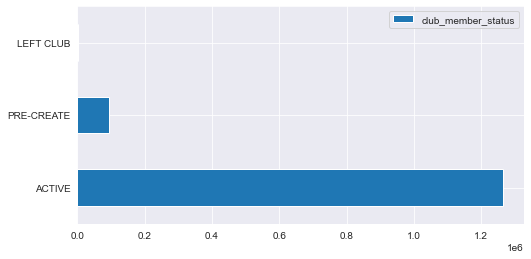

In [24]:
# 会員情報詳細の可視化
club_member_status_cnts = customers['club_member_status'].value_counts().sort_values(ascending=False)
club_member_status = pd.DataFrame(club_member_status_cnts)
club_member_status = club_member_status[:20]

figure, ax = plt.subplots(1,1, figsize = (8,4))
club_member_status.plot.barh(ax = ax) # 棒グラフ

↑全体の約93％がアクティブ会員。

In [25]:
# ニュースが送られている頻度
customers['fashion_news_frequency'].value_counts()

NONE         871598
Regularly    473843
Monthly         840
None              1
Name: fashion_news_frequency, dtype: int64

↑定期的（Regularly）にニュースを送られている顧客は全体の約35%。

In [26]:
# ファッションニュース受け取っているか
customers['FN'].value_counts()

1.0000    473359
Name: FN, dtype: int64

In [27]:
# クリック？
customers['Active'].value_counts()

1.0000    460899
Name: Active, dtype: int64